### Red Wine Quality Prediction Project
Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Attribute Information

Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12. quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model.

Inspiration Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link- https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


as per information we see that there is no null values present in dataset.

there are two type of data present in dataset  float and int

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

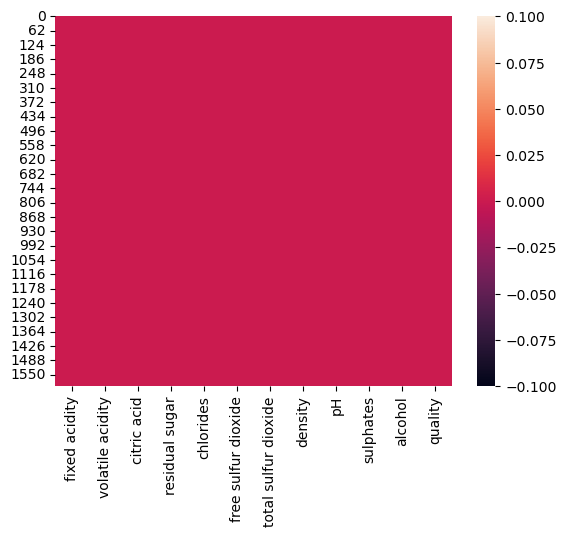

In [6]:
sns.heatmap(df.isna())

In [7]:
df.nunique().to_frame("NO. of unique values")

,NO. of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [8]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1. There are No missing Values
2. Skewness is present, we can observe by using plots.
3. Data distribution is good.

## Data Visualization

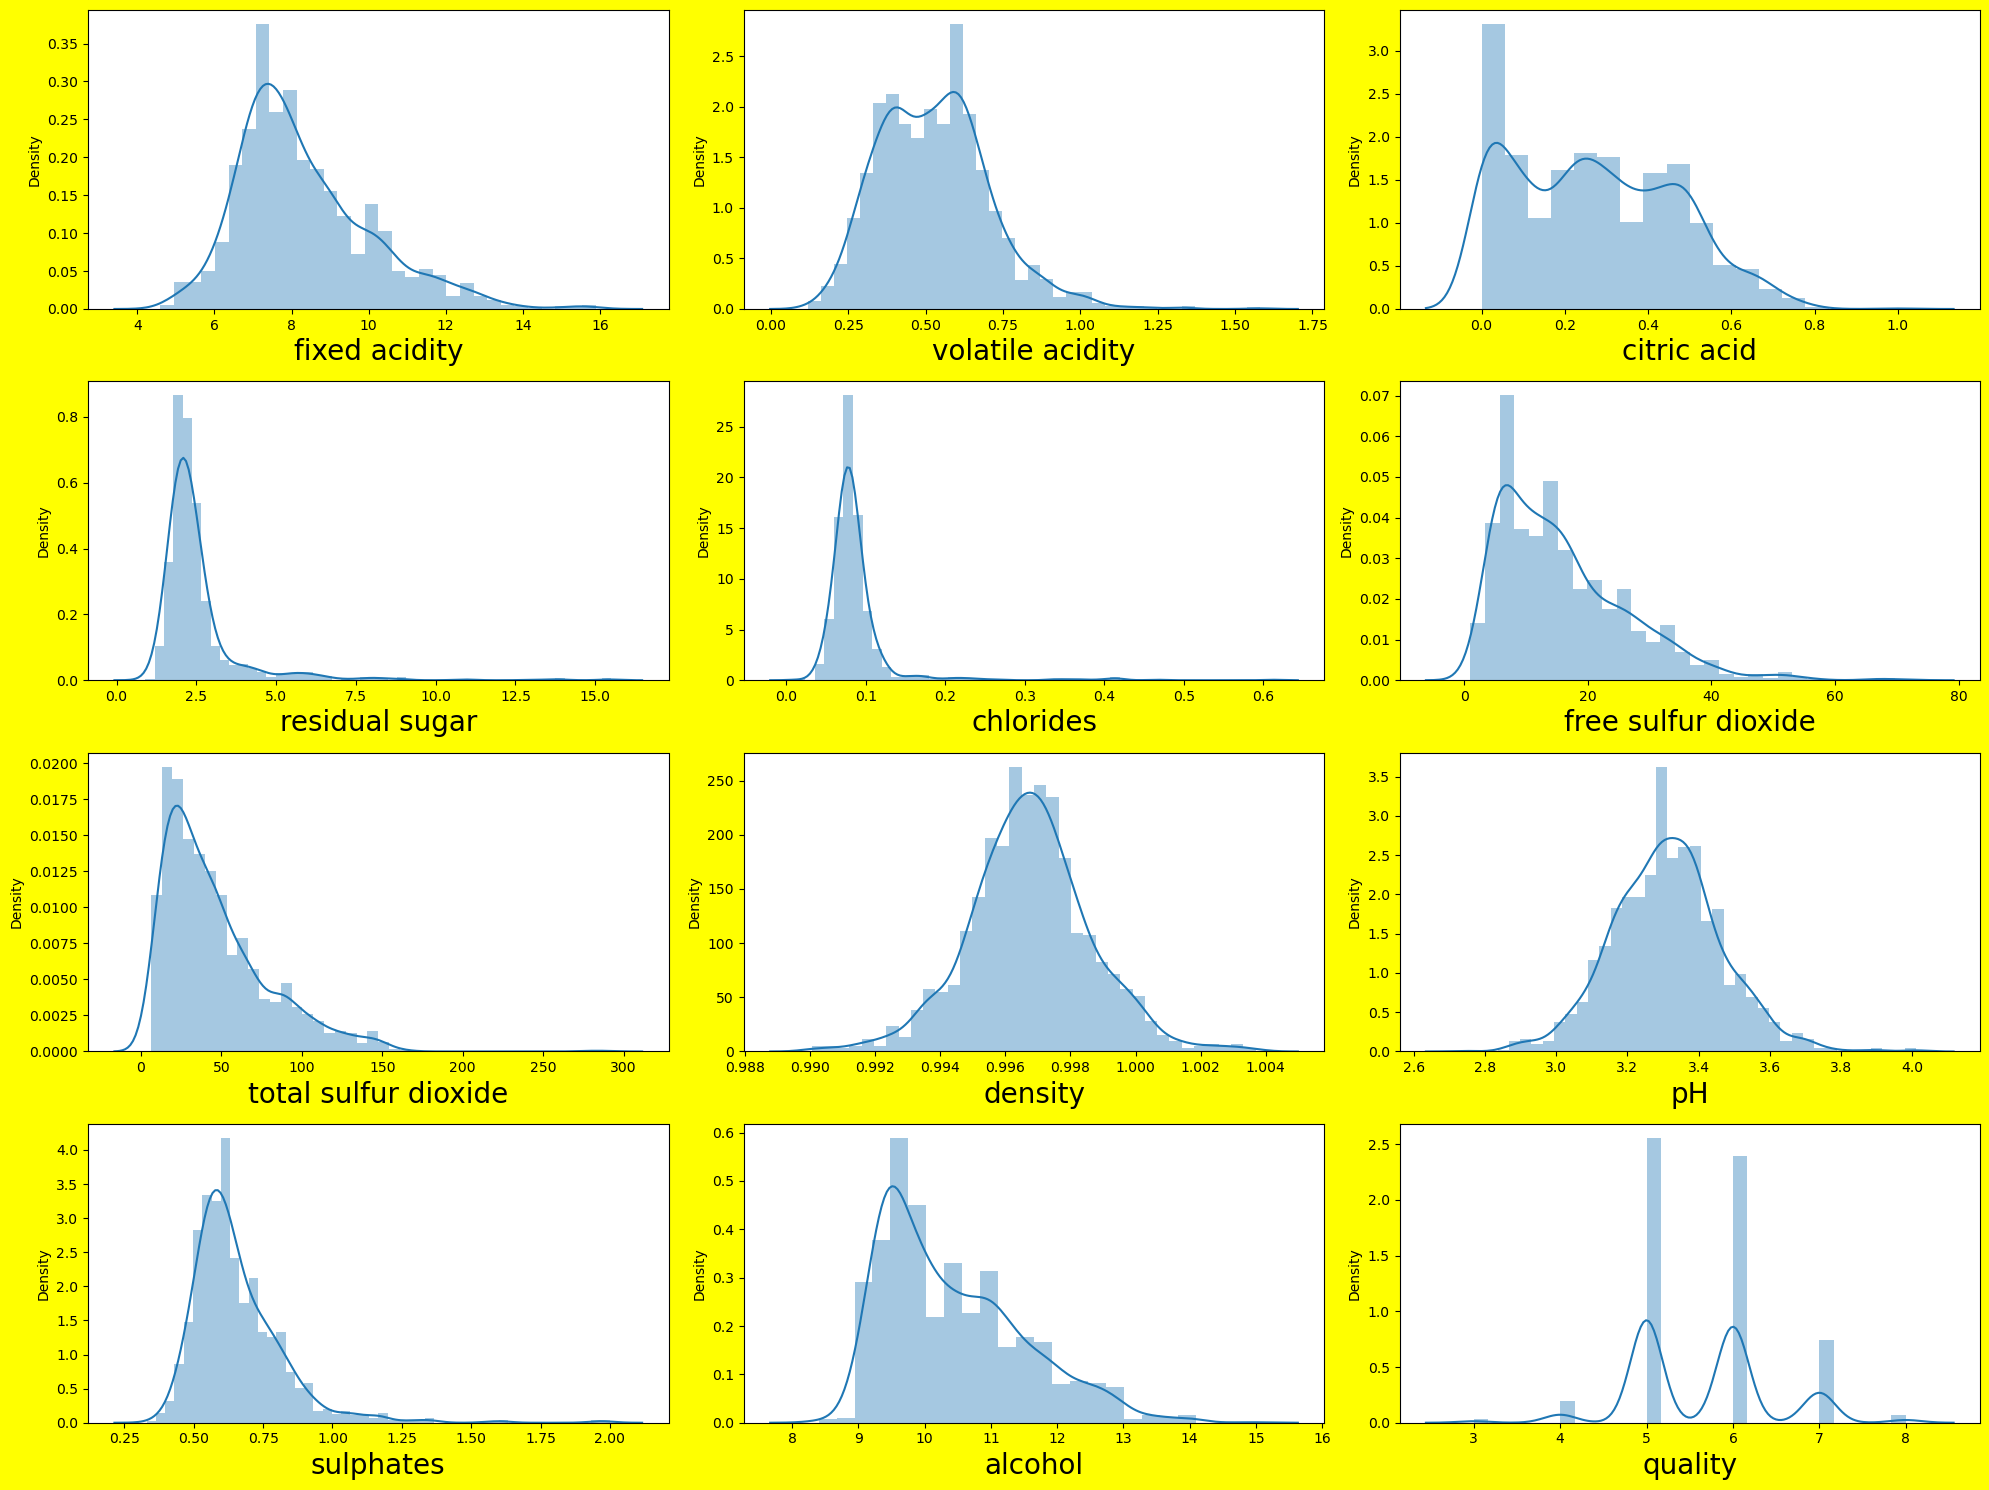

In [10]:
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber += 1
plt.tight_layout()

In [11]:
df_features = df.drop('quality', axis=1)

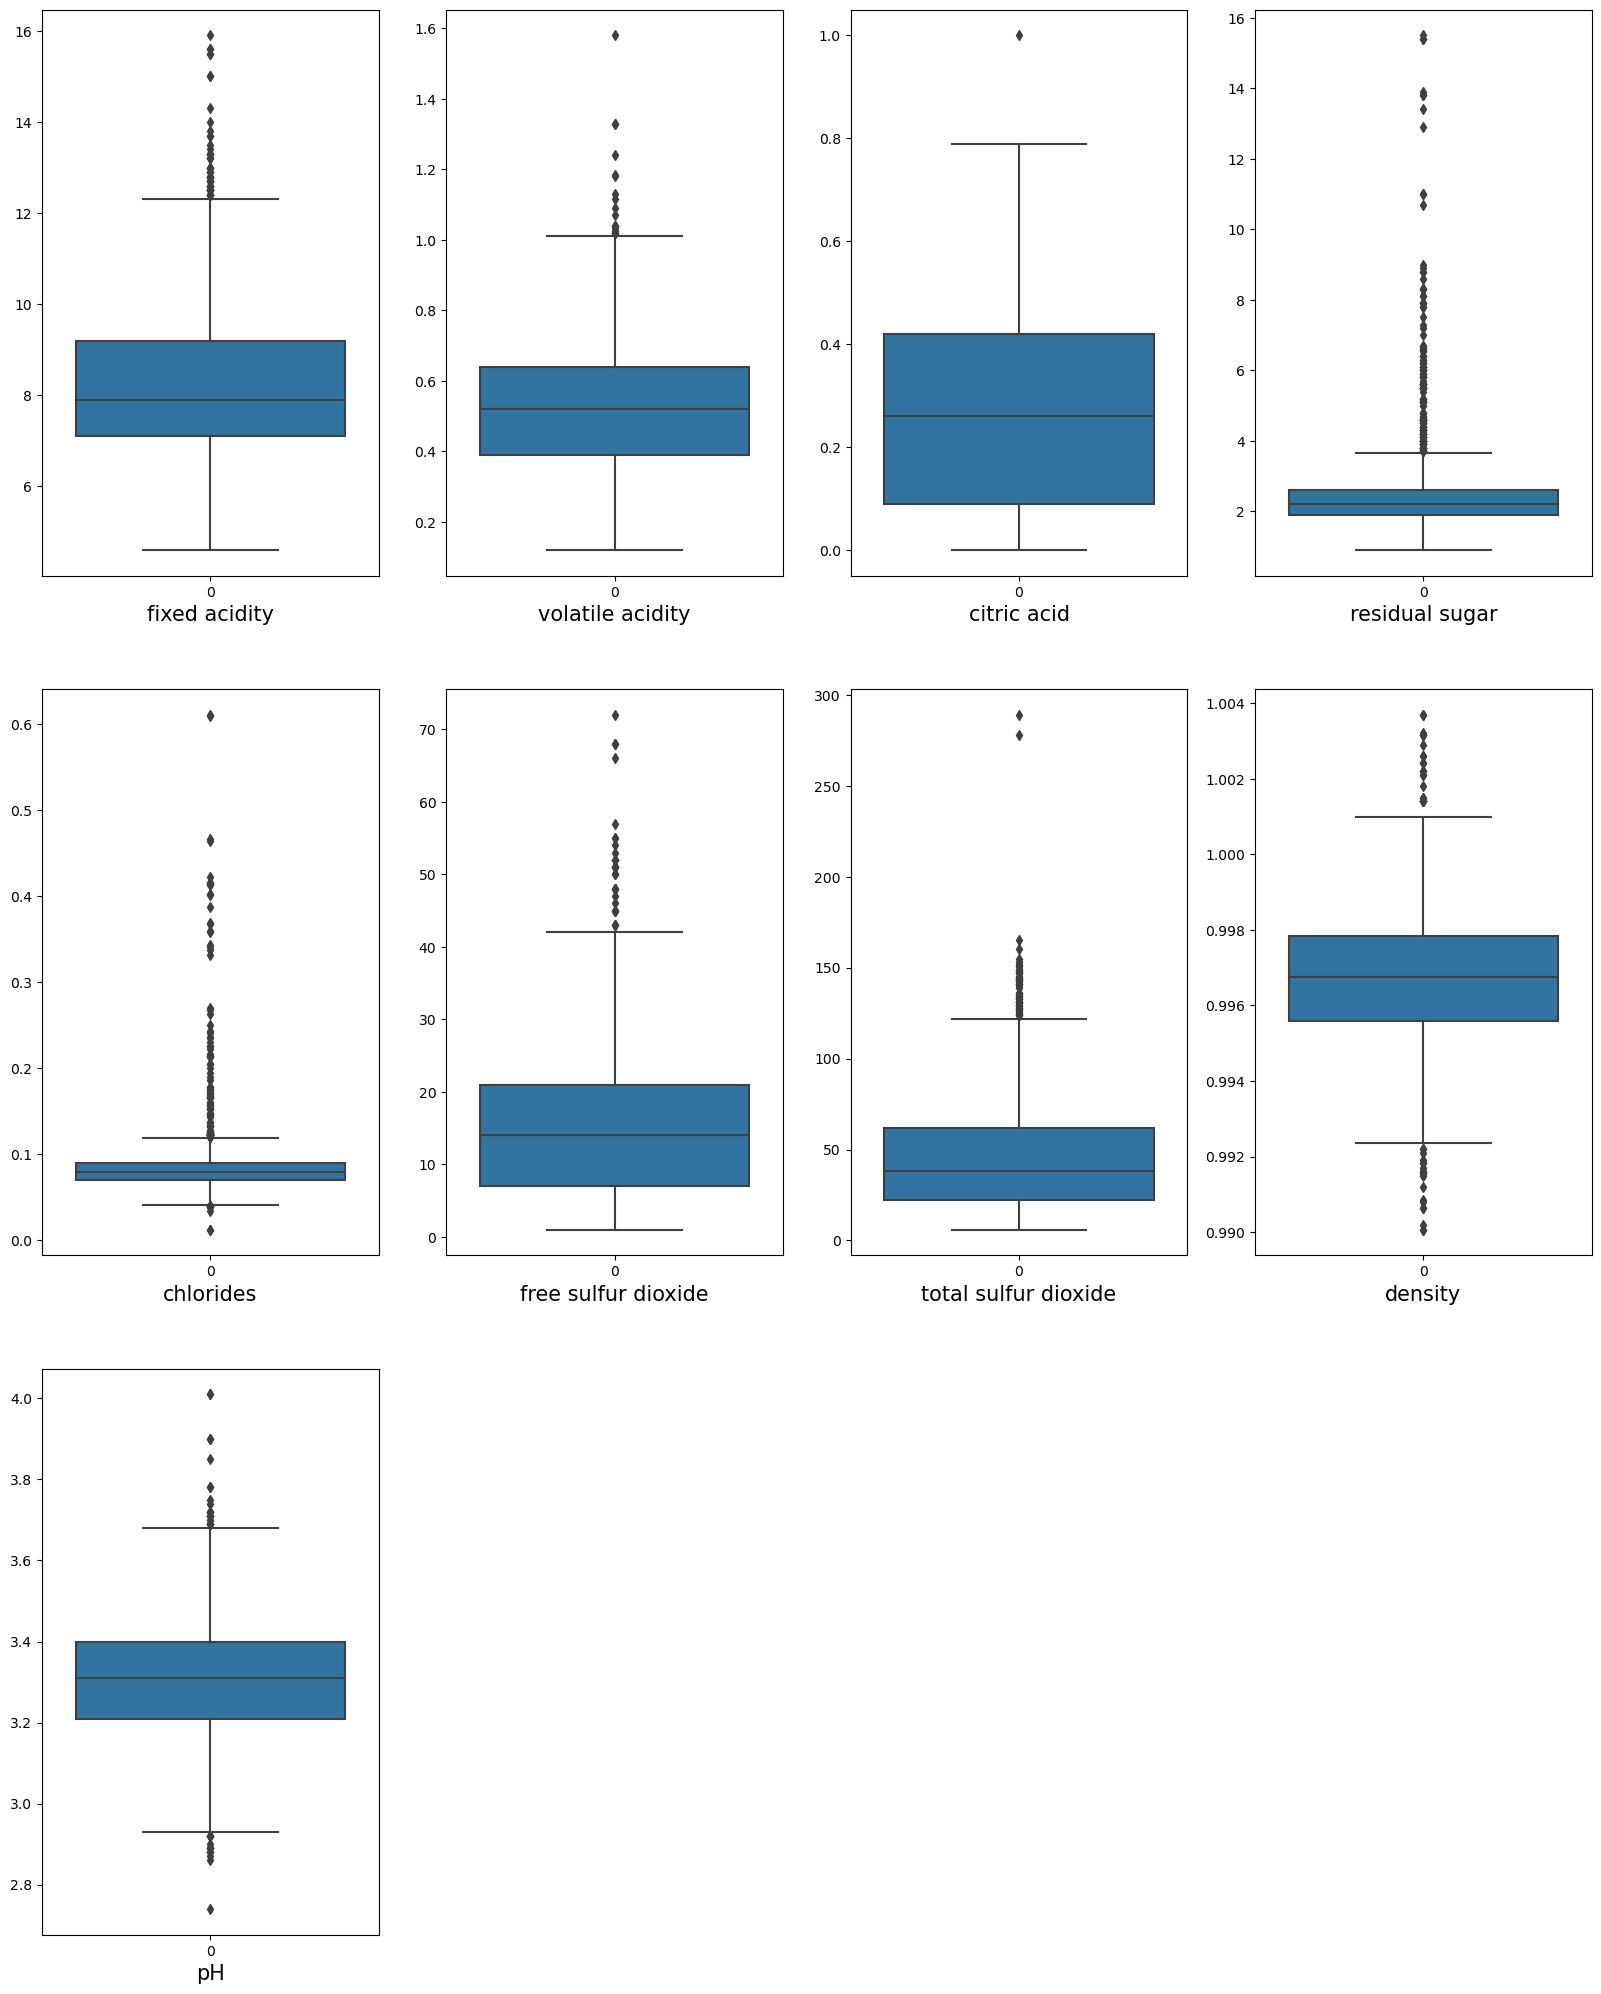

In [12]:
# visualize the outliers using boxplot

plt.figure(figsize =(20,25))
graph = 1

for column in df_features:
    if graph <=9:
        plt.subplot(3,4,graph)
        ax = sns.boxplot(data= df_features[column])
        plt.xlabel(column, fontsize=15)
    graph +=1
plt.show()

In [13]:
df.shape

(1599, 12)

By using Boxplot we clearly observe there are skewness are present

In [14]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [15]:
bins=(2,6.5,8)

group=['Bad','Good']

df['quality'] = pd.cut(df['quality'], bins=bins, labels=group)

In [16]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

#Bad becomes 0,and good becomes 1

df['quality']=lab_enc.fit_transform(df['quality'])

In [17]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


## Removing Outliers

In [18]:
#Removing Outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
z
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [19]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(1458, 12)

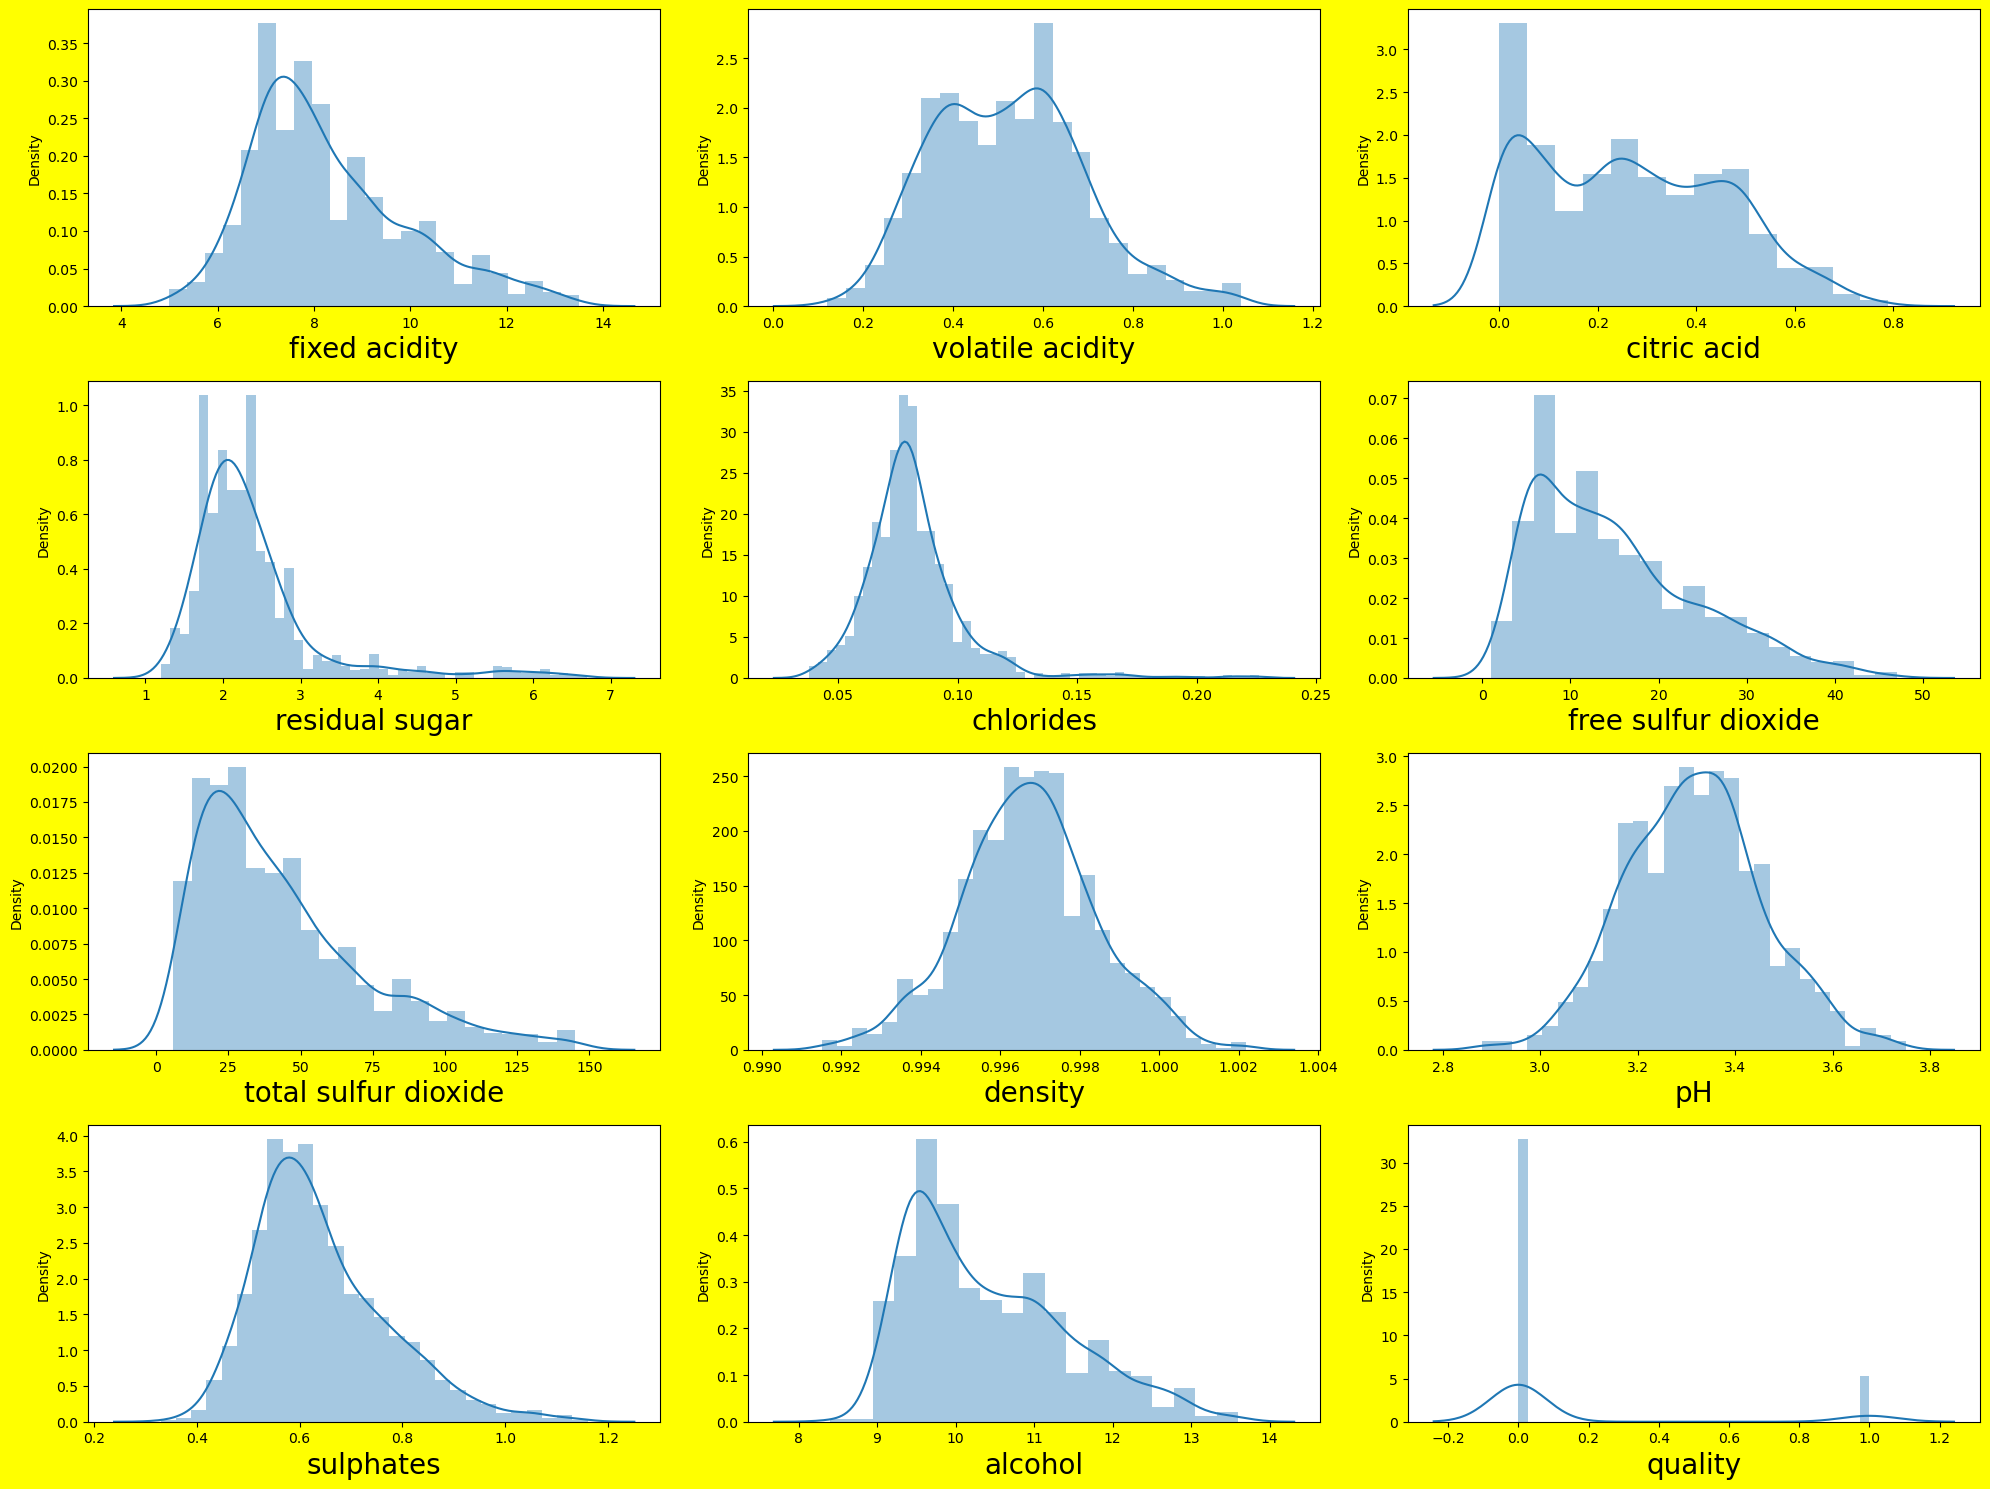

In [20]:
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in df_new:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber += 1
plt.tight_layout()

In [21]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 2.103030
dtype: float64

In [22]:
x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [23]:
#removal of skew-ness using log function

for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [24]:
x.skew()

fixed acidity           0.426008
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.542478
chlorides               2.108176
free sulfur dioxide    -0.164667
total sulfur dioxide   -0.051849
density                 0.055543
pH                      0.113039
sulphates               0.669813
alcohol                 0.602732
dtype: float64

In [25]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.128232,0.700,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,2.341806
1,2.174752,0.880,0.00,1.280934,0.093490,3.258097,4.219508,0.99680,3.20,0.518794,2.379546
2,2.174752,0.760,0.04,1.193922,0.088011,2.772589,4.007333,0.99700,3.26,0.500775,2.379546
3,2.501436,0.280,0.56,1.064711,0.072321,2.890372,4.110874,0.99800,3.16,0.457425,2.379546
4,2.128232,0.700,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,2.341806
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.974081,0.600,0.08,1.098612,0.086178,3.496508,3.806662,0.99490,3.45,0.457425,2.442347
1595,1.931521,0.550,0.10,1.163151,0.060154,3.688879,3.951244,0.99512,3.52,0.565314,2.501436
1596,1.987874,0.510,0.13,1.193922,0.073250,3.401197,3.713572,0.99574,3.42,0.559616,2.484907
1597,1.931521,0.645,0.12,1.098612,0.072321,3.496508,3.806662,0.99547,3.57,0.536493,2.415914


In [26]:
x =  df.drop("quality", axis =1)
y = df['quality']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is ", maxAccu, "at random_state", maxRS)

Best accuracy is  0.9333333333333333 at random_state 132


In [29]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [30]:
# checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8875
[[405   6]
 [ 48  21]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       411
           1       0.78      0.30      0.44        69

    accuracy                           0.89       480
   macro avg       0.84      0.64      0.69       480
weighted avg       0.88      0.89      0.87       480



In [31]:
# checking accuracy for ExtraTreesClassifier

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8958333333333334
[[407   4]
 [ 46  23]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       411
           1       0.85      0.33      0.48        69

    accuracy                           0.90       480
   macro avg       0.88      0.66      0.71       480
weighted avg       0.89      0.90      0.88       480



In [32]:
# checking accuracy for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test, predDT))
print(confusion_matrix(y_test, predDT))
print(classification_report(y_test, predDT))

0.8583333333333333
[[377  34]
 [ 34  35]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       411
           1       0.51      0.51      0.51        69

    accuracy                           0.86       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.86      0.86      0.86       480



# USE HYPERPARAMETER TUNNING

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=348)

In [34]:
# write one fuction and call as many as times to check accuracy_score of different models.

def metric_score (clf, x_train, x_test, y_train, y_test, train = True ):
    if train :
        y_pred = clf.predict(x_train)
        
        print("\n ____________TRAIN RESULT______________")
        
        print(f"Accuracy Score : {accuracy_score (y_train, y_pred) * 100:.2f}%")
   
    
    elif train == False:
        
        pred = clf.predict(x_test)
 
        print("\n ____________TEST RESULT______________")
        
        print(f"Accuracy Score : {accuracy_score (y_test, pred) * 100:.2f}%")
    
        print('\n\n TEST CLASSIFICATION REPORT\n', classification_report(y_test, pred, digits=2))  #model confidence/accuracy
    

In [35]:
# model initiation

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
# We are tunnig four Imortant Hyperparameters right now, we are passing the different values for both parameters.

param_grid = {
            'criterion':['gini','entropy'],    
            'max_depth': range(10,15),         
            'min_samples_leaf': range(2,6),    
            'min_samples_split': range(3,8),    
            'max_leaf_nodes': range(20,50)      
}     

In [37]:
gridsearch = GridSearchCV(estimator = clf, 
                           param_grid= param_grid,  
                           cv=5, 
                           n_jobs = -1)

In [38]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(20, 50),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [39]:
best_parameters = gridsearch.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 13, 'max_leaf_nodes': 35, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [45]:
# Initiate DecisionTreeClassifier with new parameters and train

final = DecisionTreeClassifier(criterion ='gini',  max_depth = 14,  min_samples_leaf = 2,  
                             min_samples_split = 6, max_leaf_nodes = 36 )

# Train the model

final.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14, max_leaf_nodes=36, min_samples_leaf=2,
                       min_samples_split=6)

In [46]:
# call the fuction and pass dataset to check train and test score

metric_score (final, x_train, x_test, y_train, y_test, train = True)  # this is for training score

metric_score (final, x_train, x_test, y_train, y_test, train = False)  # this is for testing score


 ____________TRAIN RESULT______________
Accuracy Score : 95.33%

 ____________TEST RESULT______________
Accuracy Score : 88.00%


 TEST CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       352
           1       0.50      0.42      0.45        48

    accuracy                           0.88       400
   macro avg       0.71      0.68      0.69       400
weighted avg       0.87      0.88      0.88       400



In [47]:
y_pred = final.predict(x_test)

cfm = confusion_matrix(y_test, y_pred)

cfm

array([[332,  20],
       [ 28,  20]], dtype=int64)

In [48]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Q3','Q4'], 
                                                 index = ['Q3','Q4'])

,Q3,Q4
Q3,332,20
Q4,28,20


### ACCURACY AFTER TUNNING PARAMETER IS 89%.

In [49]:
from pickle import dump
dump(final,open('winequality.pkl','wb'))

In [50]:
import pickle
loaded_model = pickle.load(open('winequality.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

88.0


In [51]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
Original,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1


# END